In [2]:
import keras
#Modified from https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
import json
from keras import backend as k
k.set_image_dim_ordering('th')
fname= 'imagenet_class_index.json'
with open(fname) as f:
    class_dict = json.load(f)
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)
    return model
# Test pretrained model
model = VGG_16("C:\\Users\\Abhishek Singh\\Desktop\\Spring 17\\IDS576\\vgg16_weights.h5")
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')


Using TensorFlow backend.


Top 5 predicted labels 
Arabian_camel
koala
teddy
llama
platypus


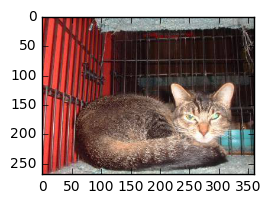

In [3]:
#sample 1
from scipy.misc import imread,imresize 
#scipy.misc.imread
%matplotlib inline
import matplotlib.pyplot as plt
im = imresize(imread('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/cats/cat.10171.jpg'), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

out = model.predict(im)
#-np.sort(-out)
#print (classes[np.argmax(out)])
#print(out)
#print(np.array(classes[out[:5]]))
print('Top 5 predicted labels ')
for i in range(5):
    print(classes[np.argsort(-out)[:,i][0]])
# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(np.uint8(imread('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/cats/cat.10171.jpg')))
plt.show()

Top 5 predicted labels 
Great_Dane
shovel
shower_curtain
totem_pole
whippet


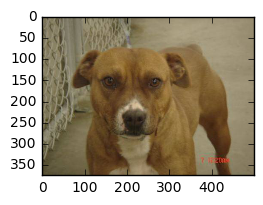

In [4]:
#sample 2
im = imresize(imread('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/dogs/dog.10391.jpg'), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

out = model.predict(im)
#predition the top 5 predictors from the random sample
print('Top 5 predicted labels ')
for i in range(5):
    print(classes[np.argsort(-out)[:,i][0]])
# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(np.uint8(imread('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/dogs/dog.10391.jpg')))
plt.show()

Top 5 predicted labels 
African_grey
Egyptian_cat
Airedale
Greater_Swiss_Mountain_dog
marmoset


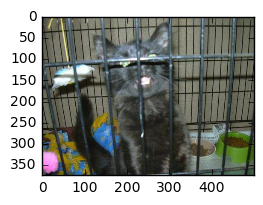

In [5]:
#sample 3
im = imresize(imread('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/cats/cat.195.jpg'), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

out = model.predict(im)
#predition the top 5 predictors from the random sample
print('Top 5 predicted labels ')
for i in range(5):
    print(classes[np.argsort(-out)[:,i][0]])
# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(np.uint8(imread('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/cats/cat.195.jpg')))
plt.show()

Top 5 predicted labels 
Samoyed
plastic_bag
Siberian_husky
Arctic_fox
Great_Pyrenees


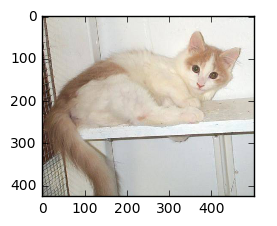

In [6]:
#sample 4
im = imresize(imread('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/cats/cat.3921.jpg'), (224, 224)).astype(np.float32)
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

out = model.predict(im)
#predition the top 5 predictors from the random sample
print('Top 5 predicted labels ')
for i in range(5):
    print(classes[np.argsort(-out)[:,i][0]])
# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(np.uint8(imread('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/cats/cat.3921.jpg')))
plt.show()

In [8]:
#Solution 7.2
import os
def load_img(path):
    images = []
    for file in os.listdir(path):
        image = imread(os.path.join(path,file))
        if image is not None:
            images.append(image)
    return images

import scipy
from scipy.misc import imread, imresize
#Loading the images from cats folder
abc=load_img('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/cats')
#Loading the images from dogs folder
abc1=load_img('C:/Users/Abhishek Singh/Desktop/Spring 17/IDS576/vgg16example/sampledata/dogs')

In [9]:
import numpy as np
#cats
X_trn = []
Y_trn = []
for i in range(79):
    im=imresize(abc[i], (224, 224)).astype(np.float32)
#im = imresize(abc[i], (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out=np.reshape(out,1000)
    X_trn.append((out))
    Y_trn.append((0))
#dogs
X_trn1 = []
Y_trn1 = []

for i in range(79):
    im=imresize(abc1[i], (224, 224)).astype(np.float32)
#im = imresize(abc[i], (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out1 = model.predict(im)
    out1=np.reshape(out1,1000)
    X_trn1.append((out1))
    Y_trn1.append((1))

X_train_complete = X_trn+X_trn1
Y_train_complete = Y_trn+Y_trn1

import numpy as np
X_trn_array = np.asarray(X_train_complete)
Y_trn_array = np.asarray(Y_train_complete)

In [11]:
#Partitionng the complete data into test and train 80:20 split
import random as random
random.seed(8080)
m = np.random.rand(len(X_trn_array)) < 0.8

X_trn = X_trn_array[m]
Y_trn = Y_trn_array[m]
X_tst = X_trn_array[~m]
Y_tst = Y_trn_array[~m]

In [52]:
#Linear Classifier
def classifier(X_trn,y_trn, step_size,reg, no_iter ):
    
#Initial value for the Gradient Descent Parameter
    #step_size = 1e-0 #Also called learning rate
    D = X_trn.shape[1] #Number of features
    K = max(y_trn)+1 #Number of classes assuming class index starts from 0
    
    np.random.seed(1234)
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    num_examples = X_trn.shape[0]
#For simplicity, we will not hand tune this algorithm parameter as well.

# gradient descent loop
    for i in range(no_iter):
        #print(no_iter)
    # evaluate class scores, [N x K]
        scores = np.dot(X_trn, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_trn])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        # if i % 10 == 0:
           #print "iteration %d: loss %f" % (i, loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_trn] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_trn.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    
    return(W,b)

In [53]:
# Post-training: evaluate train set accuracy

W,b = classifier(X_trn, Y_trn, 0.5, 0.001, 10000)
scores = np.dot(X_trn, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('Train accuracy: %.2f' % (np.mean(predicted_class == Y_trn)))

# Post-training: evaluate test set accuracy

scores = np.dot(X_tst, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('Test accuracy: %.2f' % (np.mean(predicted_class == Y_tst)))

Train accuracy: 0.94
Test accuracy: 0.73


In [54]:
#K Fold Cross Validation
import sklearn
from sklearn.cross_validation import KFold
kf = KFold(len(X_trn_array), n_folds=10,shuffle=True, random_state=None)
len(kf)
print(kf)
sklearn.cross_validation.KFold(len(X_trn_array), n_folds=10 ,shuffle=True, random_state=None)

for train_index, test_index in kf:
  
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_trn_array[train_index], X_trn_array[test_index]
    y_train, y_test = Y_trn_array[train_index], Y_trn_array[test_index]
    W1, b1 = classifier(X_train,y_train, 1e-0, 0.01, 2000)
    #print(W1,b1)
    #Computing Accuracy
    scores = np.dot(X_test, W1) + b1
    predicted_class = np.argmax(scores, axis=1)
    print ('Test accuracy: %.2f' % (np.mean(predicted_class == y_test)))

sklearn.cross_validation.KFold(n=158, n_folds=10, shuffle=True, random_state=None)
Test accuracy: 0.69
Test accuracy: 0.62
Test accuracy: 0.50
Test accuracy: 0.50
Test accuracy: 0.62
Test accuracy: 0.75
Test accuracy: 0.56
Test accuracy: 0.50
Test accuracy: 0.60
Test accuracy: 0.87


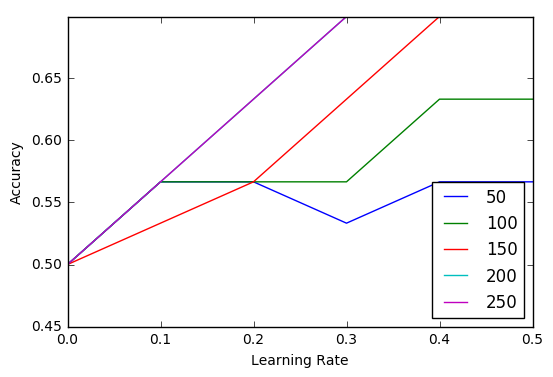

In [55]:
# Question 4 - 5 - Different Learning rates and Gradient Descent Iterations
import matplotlib.pyplot as pyplt
Acc1=[]
learn_rate=[]
i=1
for i in range(5):
    Acc1=[]
    learn_rate=[]
    for j in range(6):
        learn_rate.append(0.1*j)
        W1,b1 = classifier(X_trn, Y_trn, 0.1*j, 0.01, 50*(i+1))
        # evaluate class scores, [N x K]
        scores = np.dot(X_tst, W1) + b1
        predicted_class = np.argmax(scores, axis=1)

        Acc = np.mean(predicted_class == Y_tst)
        Acc1.append(np.mean(predicted_class == Y_tst))
    pyplt.plot(learn_rate,Acc1, label = 50*(i+1))
pyplt.legend(loc = 4)
pyplt.xlabel('Learning Rate')
pyplt.ylabel('Accuracy')
pyplt.show()

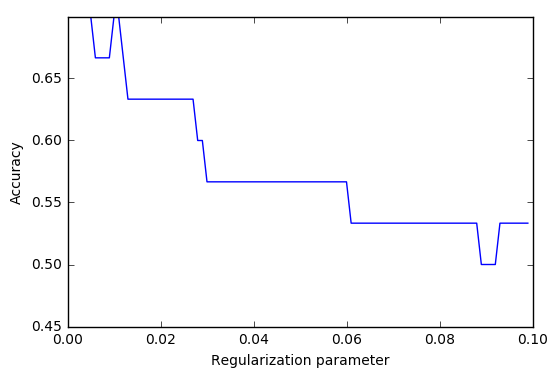

In [56]:
#Solution 7 Q4 Part 6 - Different regularization Parameters
reg_rate=[]
Acc1=[]
for i in range(100):
    reg_rate.append(0.001*i)
    W1,b1 = classifier(X_trn, Y_trn, 0.6, 0.001*i, 100)
    # evaluate class scores, [N x K]
    scores = np.dot(X_tst, W1) + b1
    predicted_class = np.argmax(scores, axis=1)
    
    Acc = np.mean(predicted_class == Y_tst)
    #print 'Test accuracy: %.2f' % (Acc)
    Acc1.append(np.mean(predicted_class == Y_tst))
    
pyplt.plot(reg_rate,Acc1)
pyplt.xlabel('Regularization parameter')
pyplt.ylabel('Accuracy')
pyplt.show()

In [57]:
#Q7 Partitionng the complete data into test and train 50:50 split
import random as random
random.seed(1234)
m = np.random.rand(len(X_trn_array)) < 0.5

X_trn1 = X_trn_array[m]
Y_trn1 = Y_trn_array[m]
X_tst1 = X_trn_array[~m]
Y_tst1 = Y_trn_array[~m]

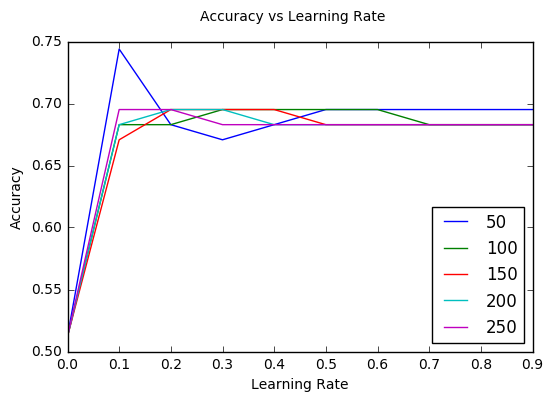

In [58]:
# Question 7 - Different Learning rates and Gradient Descent Iterations 50:50
import matplotlib.pyplot as pyplt
Acc1=[]
learn_rate=[]
i=1
for i in range(5):
    Acc1=[]
    learn_rate=[]
    for j in range(10):
        learn_rate.append(0.1*j)
        W1,b1 = classifier(X_trn1, Y_trn1, 0.1*j, 0.01, 50*(i+1))
        # evaluate class scores, [N x K]
        scores = np.dot(X_tst1, W1) + b1
        predicted_class = np.argmax(scores, axis=1)

        Acc = np.mean(predicted_class == Y_tst1)
        #print 'Test accuracy: %.2f' % (Acc)
        #print(learn_rate)
        Acc1.append(np.mean(predicted_class == Y_tst1))
    pyplt.plot(learn_rate,Acc1, label = 50*(i+1))
pyplt.legend(loc = 4)
pyplt.suptitle ("Accuracy vs Learning Rate")
pyplt.xlabel('Learning Rate')
pyplt.ylabel('Accuracy')
pyplt.show()

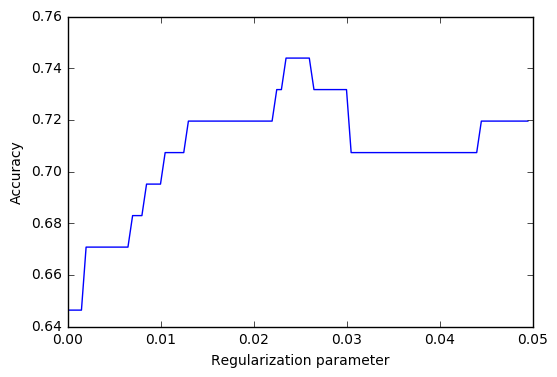

In [61]:
#Question 7 Q4 Part 6 - Different regularization Parameters
reg_rate=[]
Acc1=[]
for i in range(100):
    reg_rate.append(0.0005*i)
    W1,b1 = classifier(X_trn1, Y_trn1, 0.005, 0.05*i, 100)
    # evaluate class scores, [N x K]
    scores = np.dot(X_tst1, W1) + b1
    predicted_class = np.argmax(scores, axis=1)
    
    Acc = np.mean(predicted_class == Y_tst1)
    #print 'Test accuracy: %.2f' % (Acc)
    Acc1.append(np.mean(predicted_class == Y_tst1))
    
pyplt.plot(reg_rate,Acc1)
pyplt.xlabel('Regularization parameter')
pyplt.ylabel('Accuracy')
pyplt.show()

In [62]:
#Q7: Question 5 - Part 1

import numpy as np
import random as random
random.seed(1234)
m = np.random.rand(len(X_trn_array)) < 0.8

X_trn2 = X_trn_array[m]
Y_trn2 = Y_trn_array[m]
X_tst2 = X_trn_array[~m]
Y_tst2 = Y_trn_array[~m]

In [65]:
num_examples = X_trn2

#Define local varaibles
D = X_trn2.shape[1] #Number of features
K = max(Y_trn2)+1 #Number of classes assuming class index starts from 0
print(D)
print(K)

1000
2


In [66]:
#Q7: Define Feed forward Neural Network Classifier

def FNN_Classifier(X,y,step_size, reg, no_iter):
       
    # Start with an initial set of parameters randomly
    h = 100 # size of hidden layer
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))

    num_examples = X.shape[0]

    # gradient descent loop
    for i in range(no_iter):

        # evaluate class scores, [N x K]
        hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
        scores = np.dot(hidden_layer, W2) + b2

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        #if i % 1000 == 0:
            #print "iteration %d: loss %f" % (i, loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
        # finally into W,b
        dW = np.dot(X.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
    return(W,b,W2,b2)

In [67]:
def LR(X):
    for i in X:
        for j in i:
            if j<0:
                j*=.01
    return X

#Q5-2 Leaky ReLu
def FNN_ClassifierLeakyRelu(X,y,step_size, reg, no_iter):
    #For simplicity we will take the batch size to be the same as number of examples
    
    # Start with an initial set of parameters randomly
    h = 100 # size of hidden layer
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))

    num_examples = X.shape[0]

    #Initial value for the Gradient Descent Parameter
    #step_size = 1e-0 #Also called learning rate

    # Initial values from hyperparameter
    #reg = 1e-3 # regularization strength

    # gradient descent loop
    for i in range(no_iter):

        # evaluate class scores, [N x K]
        hidden_layer = LR(np.dot(X, W) + b) # note, Leaky ReLU activation
        scores = np.dot(hidden_layer, W2) + b2
                           
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        #if i % 100 == 0:
            #print ("iteration %d: loss %f" % (i, loss))

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        # backprop the Leaky ReLU non-linearity
        dhidden[hidden_layer <= 0] *= 0.01
        # finally into W,b
        dW = np.dot(X.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
    return(W,b,W2,b2)

In [68]:
#Evaluate the Train and Test Accuracy

W,b,W2,b2 = FNN_Classifier(X_trn2, Y_trn2, 1e-0,1e-3,10000 )
hidden_layer = np.maximum(0, np.dot(X_trn2, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('Train accuracy: %.2f' % (np.mean(predicted_class == Y_trn2)))


hidden_layer = np.maximum(0, np.dot(X_tst2, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('Test accuracy: %.2f' % (np.mean(predicted_class == Y_tst2)))

Train accuracy: 0.96
Test accuracy: 0.79


In [70]:
#Cross Validation
import sklearn
from sklearn.cross_validation import KFold
kf = KFold(len(X_trn_array), n_folds=4,shuffle=True, random_state=None)
len(kf)
print(kf)
sklearn.cross_validation.KFold(n=len(X_trn_array), n_folds=4, shuffle=True,random_state=None)

for train_index, test_index in kf:
  
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_trn_array[train_index], X_trn_array[test_index]
    y_train, y_test = Y_trn_array[train_index], Y_trn_array[test_index]
    W,b,W2,b2 = FNN_Classifier(X_train, y_train, 1e-0,1e-3,10000 )
    #print(W,b,W2,b2)
    #Computing Accuracy
    hidden_layer = np.maximum(0, np.dot(X_test, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    print ('Test accuracy: %.2f' % (np.mean(predicted_class == y_test)))

sklearn.cross_validation.KFold(n=158, n_folds=4, shuffle=True, random_state=None)
Test accuracy: 0.62
Test accuracy: 0.80
Test accuracy: 0.69
Test accuracy: 0.64


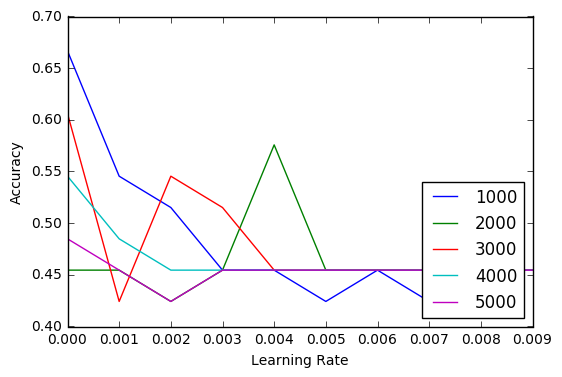

In [72]:
#Q 7 Solution 5 - Part 1

Acc1=[]
learn_rate=[]
for i in range(5):
    Acc1=[]
    learn_rate=[]
    for j in range(10):
        learn_rate.append(0.001*j)
        W,b,W2,b2 = FNN_Classifier(X_trn2, Y_trn2, 0.001*j, 0.005, 4*(i+1))
        # evaluate class scores, [N x K]
        hidden_layer = np.maximum(0, np.dot(X_tst2, W) + b)
        scores = np.dot(hidden_layer, W2) + b2
        predicted_class = np.argmax(scores, axis=1)

        Acc = np.mean(predicted_class == Y_tst2)
        #print 'Test accuracy: %.2f' % (Acc)
        #print(learn_rate)
        Acc1.append(np.mean(predicted_class == Y_tst2))
    pyplt.plot(learn_rate,Acc1, label = 1000*(i+1))
pyplt.legend(loc = 4)
pyplt.xlabel('Learning Rate')
pyplt.ylabel('Accuracy')
pyplt.show()

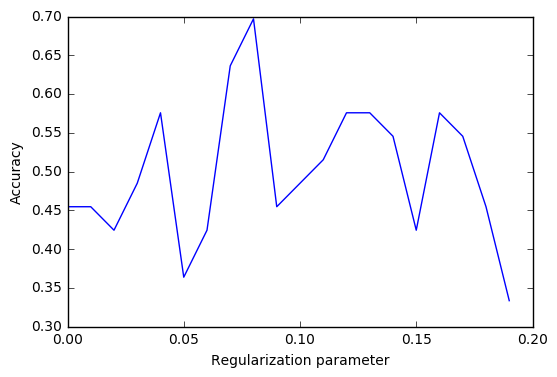

In [74]:
#Q7 Solution Q5-1 - Different regularization Parameters

reg_rate=[]
Acc1=[]
i=1
for i in range(20):
    reg_rate.append(0.01*i)
    W,b,W2,b2 = FNN_Classifier(X_trn2, Y_trn2, 0.0001, 0.01*i, 10)
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X_tst2, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)

    Acc = np.mean(predicted_class == Y_tst2)
    #print 'Test accuracy: %.2f' % (Acc)
    #print(learn_rate)
    Acc1.append(np.mean(predicted_class == Y_tst2))
    
pyplt.plot(reg_rate,Acc1)
pyplt.xlabel('Regularization parameter')
pyplt.ylabel('Accuracy')
pyplt.show()

In [76]:
W,b,W2,b2 = FNN_Classifier(X_trn2, Y_trn2, 0.0005, 0.001, 100)
    # evaluate class scores, [N x K]
hidden_layer = np.maximum(0, np.dot(X_tst2, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)

Acc = np.mean(predicted_class == Y_tst2)
print ('Test accuracy: %.2f' % (Acc))
    #print(learn_rate)
#Acc1.append(np.mean(predicted_class == Y_tst2))

Test accuracy: 0.45


In [77]:
def LR(X):
    for i in X:
        for j in i:
            if j<0:
                j*=.01
    return X

#Q5-2 Leaky ReLu
def FNN_ClassifierLeakyRelu(X,y,step_size, reg, no_iter):
    #For simplicity we will take the batch size to be the same as number of examples
    
    # Start with an initial set of parameters randomly
    h = 100 # size of hidden layer
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))

    num_examples = X.shape[0]

    #Initial value for the Gradient Descent Parameter
    #step_size = 1e-0 #Also called learning rate

    # Initial values from hyperparameter
    #reg = 1e-3 # regularization strength

    # gradient descent loop
    for i in range(no_iter):

        # evaluate class scores, [N x K]
        hidden_layer = LR(np.dot(X, W) + b) # note, Leaky ReLU activation
        scores = np.dot(hidden_layer, W2) + b2
                           
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        #if i % 100 == 0:
            #print ("iteration %d: loss %f" % (i, loss))

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = np.dot(dscores, W2.T)
        # backprop the Leaky ReLU non-linearity
        dhidden[hidden_layer <= 0] *= 0.01
        # finally into W,b
        dW = np.dot(X.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
    return(W,b,W2,b2)

In [79]:
# Post-training: evaluate test set accuracy

W,b,W2,b2 = FNN_ClassifierLeakyRelu(X_trn2, Y_trn2, 1e-0,1e-4,1000)
hidden_layer = np.maximum(np.dot(0.01*X_trn2, W) + b, np.dot(X_trn2, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('Train accuracy: %.2f' % (np.mean(predicted_class == Y_trn2)))


hidden_layer = np.maximum(np.dot(0.01*X_tst2, W) + b, np.dot(X_tst2, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('Test accuracy: %.2f' % (np.mean(predicted_class == Y_tst2)))

Train accuracy: 0.98
Test accuracy: 0.73


In [80]:
#Cross Validation
import sklearn
from sklearn.cross_validation import KFold
kf = KFold(len(X_trn_array), n_folds=4,shuffle=True, random_state=None)
len(kf)
print(kf)
sklearn.cross_validation.KFold(len(X_trn_array), n_folds=4, shuffle=True,random_state=None)

for train_index, test_index in kf:
  
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_trn_array[train_index], X_trn_array[test_index]
    y_train, y_test = Y_trn_array[train_index], Y_trn_array[test_index]
    W,b,W2,b2 = FNN_ClassifierLeakyRelu(X_train, y_train, 0.4, 0.0001, 100)
    #print(W,b,W2,b2)
    #Computing Accuracy
    hidden_layer = np.maximum(0, np.dot(X_test, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    print ('Test accuracy: %.2f' % (np.mean(predicted_class == y_test)))

sklearn.cross_validation.KFold(n=158, n_folds=4, shuffle=True, random_state=None)
Test accuracy: 0.47
Test accuracy: 0.68
Test accuracy: 0.46
Test accuracy: 0.56


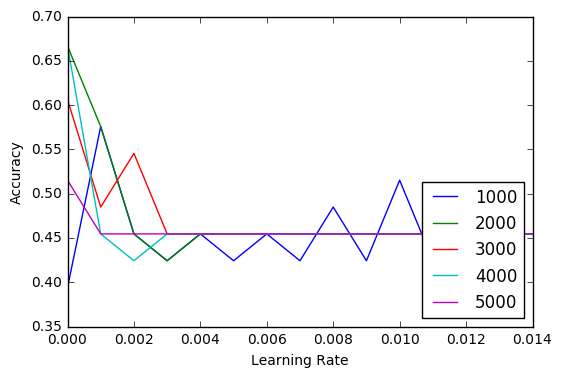

In [81]:
#Different Learning rates and Gradient Descent Iterations

Acc1=[]
learn_rate=[]
for i in range(5):
    Acc1=[]
    learn_rate=[]
    for j in range(15):
        learn_rate.append(0.001*j)
        W,b,W2,b2 = FNN_ClassifierLeakyRelu(X_trn2, Y_trn2, 0.001*j, 0.0005, 4*(i+1))
        # evaluate class scores, [N x K]
        hidden_layer = np.maximum(0, np.dot(X_tst2, W) + b)
        scores = np.dot(hidden_layer, W2) + b2
        predicted_class = np.argmax(scores, axis=1)

        Acc = np.mean(predicted_class == Y_tst2)
        #print 'Test accuracy: %.2f' % (Acc)
        #print(learn_rate)
        Acc1.append(np.mean(predicted_class == Y_tst2))
    pyplt.plot(learn_rate,Acc1, label = 1000*(i+1))
pyplt.legend(loc = 4)
pyplt.xlabel('Learning Rate')
pyplt.ylabel('Accuracy')
pyplt.show()


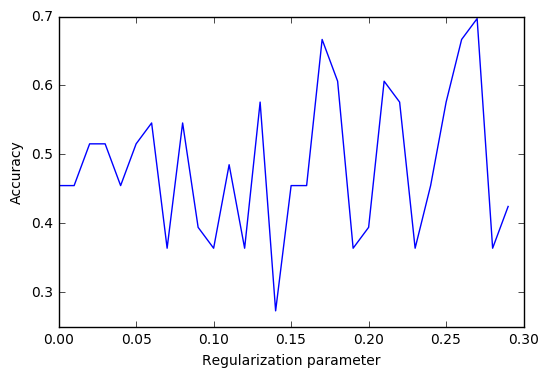

In [83]:
#Different regularization Parameters
reg_rate=[]
Acc1=[]
i=1
for i in range(30):
    reg_rate.append(0.01*i)
    W,b,W2,b2 = FNN_ClassifierLeakyRelu(X_trn2, Y_trn2, 0.0002, 0.01*i, 10)
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X_tst2, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)

    Acc = np.mean(predicted_class == Y_tst2)
    #print 'Test accuracy: %.2f' % (Acc)
    #print(learn_rate)
    Acc1.append(np.mean(predicted_class == Y_tst2))
    
pyplt.plot(reg_rate,Acc1)
pyplt.xlabel('Regularization parameter')
pyplt.ylabel('Accuracy')
pyplt.show()

In [84]:
#Solution 5 - Part 3 - Define FNN Classifer for Maxout Non-linearity - SHUBHAM

#Perform batch SGD using manual backprop

def FNN_Classifier_NL(X,y,step_size, reg, no_iter):
        
    # Start with an initial set of parameters randomly
    h1 = 100 # size of hidden layer1
    #h2 = 100 # size of hidden layer2
    W1 = 0.01 * np.random.randn(D,h1)
    b1 = np.zeros((1,h1))
    W2 = 0.01 * np.random.randn(D,h1)
    b2 = np.zeros((1,h1))
    W3 = 0.01 * np.random.randn(h1,K)
    b3 = np.zeros((1,K))

    num_examples = X.shape[0]

    # gradient descent loop
    for i in range(no_iter):

        # evaluate class scores, [N x K]
        #hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) # note, ReLU activation
        #hidden_layer2 = np.maximum(0, np.dot(X, W2) + b2) # note, ReLU activation
        hidden_layer = np.maximum(np.dot(X, W1) + b1, np.dot(X, W2) + b2) # note, ReLU activation
        scores = np.dot(hidden_layer, W3) + b3

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W3*W3)
        loss = data_loss + reg_loss
        #if i % 1000 == 0:
            #print "iteration %d: loss %f" % (i, loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
        
        dW3 = np.dot(hidden_layer.T, dscores)
        db3 = np.sum(dscores, axis=0, keepdims=True)
        
        #dhidden[hidden_layer <= 0] = 0
        dhidden2 = np.where(np.dot(X, W2) + b2 >= np.dot(X, W1) + b, np.dot(dscores, W3.T), 0)
        dhidden  = np.where(np.dot(X, W2) + b2 <= np.dot(X, W1) + b, np.dot(dscores, W3.T), 0)
  
        # finally into W,b, W2,b2
  
        dW2 = np.dot(X.T, dhidden2)
        db2 = np.sum(dhidden2, axis=0, keepdims=True)
        dW1 = np.dot(X.T, dhidden)
        db1 = np.sum(dhidden, axis=0, keepdims=True)
        

        # add regularization gradient contribution
        dW3 += reg * W3
        dW2 += reg * W2
        dW1 += reg * W1

        # perform a parameter update
        W1 += -step_size * dW1
        b1 += -step_size * db1
        W2 += -step_size * dW2
        b2 += -step_size * db2
        W3 += -step_size * dW3
        b3 += -step_size * db3
    return(W1,b1,W2,b2,W3,b3)

In [86]:
#Evaluate the Train and Test Accuracy

W1,b1,W2,b2,W3,b3 = FNN_Classifier_NL(X_trn2, Y_trn2, 0.5,0.0005,1000)
hidden_layer = np.maximum(np.dot(X_trn2, W1) + b1, np.dot(X_trn2, W2) + b2) # note, ReLU activation
scores = np.dot(hidden_layer, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print ('Train accuracy: %.2f' % (np.mean(predicted_class == Y_trn2)))


hidden_layer = np.maximum(np.dot(X_tst2, W1) + b1, np.dot(X_tst2, W2) + b2) # note, ReLU activation
scores = np.dot(hidden_layer, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print ('Test accuracy: %.2f' % (np.mean(predicted_class == Y_tst2)))

Train accuracy: 0.95
Test accuracy: 0.76


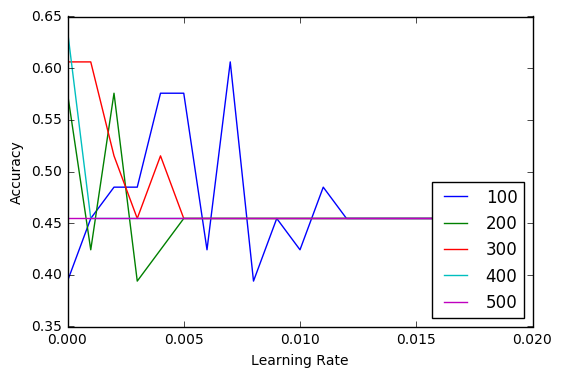

In [87]:
#Different Learning rates and Gradient Descent Iterations

Acc1=[]
learn_rate=[]
i=1
for i in range(5):
    #print(i)
    Acc1=[]
    learn_rate=[]
    for j in range(20):
        learn_rate.append(0.001*j)
        W1,b1,W2,b2,W3,b3 = FNN_Classifier_NL(X_trn2, Y_trn2, 0.001*j, 0.0005, 4*(i+1))
        
        # evaluate class scores, [N x K]
        hidden_layer = np.maximum(np.dot(X_tst2, W1) + b1, np.dot(X_tst2, W2) + b2) # note, ReLU activation
        scores = np.dot(hidden_layer, W3) + b3
        predicted_class = np.argmax(scores, axis=1)
        Acc = np.mean(predicted_class == Y_tst2)
        #print 'Test accuracy: %.2f' % (Acc)
        #print(learn_rate)
        Acc1.append(np.mean(predicted_class == Y_tst2))
    pyplt.plot(learn_rate,Acc1, label = 100*(i+1))
pyplt.legend(loc = 4)
pyplt.xlabel('Learning Rate')
pyplt.ylabel('Accuracy')
pyplt.show()

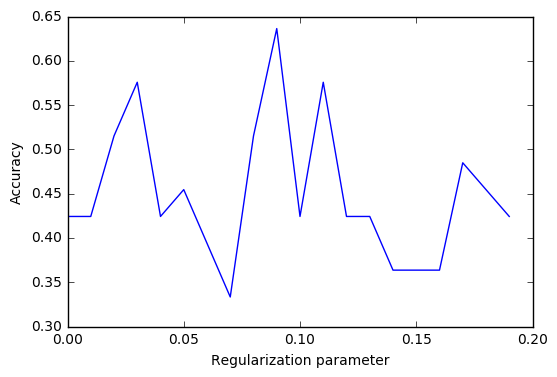

In [88]:
#Different regularization Parameters
reg_rate=[]
Acc1=[]
i=1
for i in range(20):
    reg_rate.append(0.01*i)
    W1,b1,W2,b2,W3,b3 = FNN_Classifier_NL(X_trn2, Y_trn2, 0.0005, 0.01*i, 10)
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(np.dot(X_tst2, W1) + b1, np.dot(X_tst2, W2) + b2) # note, ReLU activation
    scores = np.dot(hidden_layer, W3) + b3
    predicted_class = np.argmax(scores, axis=1)
    Acc = np.mean(predicted_class == Y_tst2)
    #print 'Test accuracy: %.2f' % (Acc)
    #print(learn_rate)
    Acc1.append(np.mean(predicted_class == Y_tst2))
    
pyplt.plot(reg_rate,Acc1)
pyplt.xlabel('Regularization parameter')
pyplt.ylabel('Accuracy')
pyplt.show()



In [96]:
#Cross Validation
import sklearn
from sklearn.cross_validation import KFold
kf = KFold(len(X_trn_array), n_folds=4,shuffle=True, random_state=None)
len(kf)
print(kf)
sklearn.cross_validation.KFold(n=len(X_trn_array), n_folds=4, shuffle=True,random_state=None)

for train_index, test_index in kf:
  
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_trn_array[train_index], X_trn_array[test_index]
    y_train, y_test = Y_trn_array[train_index], Y_trn_array[test_index]
    W1,b1,W2,b2,W3,b3 = FNN_Classifier_NL(X_train, y_train, 0.05, 0.01, 5)
    hidden_layer = np.maximum(np.dot(X_test, W1) + b1, np.dot(X_test, W2) + b2) # note, ReLU activation
    scores = np.dot(hidden_layer, W3) + b3
    predicted_class = np.argmax(scores, axis=1)
    print ('Test accuracy: %.2f' % (np.mean(predicted_class == y_test)))

sklearn.cross_validation.KFold(n=158, n_folds=4, shuffle=True, random_state=None)
Test accuracy: 0.47
Test accuracy: 0.45
Test accuracy: 0.49
Test accuracy: 0.46
